In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Visulaizing and performing LDA on the CIFAR-10 dataset

In [2]:
! cp /content/gdrive/MyDrive/Assignment3/cifar-10-python.tar.gz .

In [3]:
! tar -xf cifar-10-python.tar.gz 

In [6]:
import pickle
import os
import numpy as np
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
batch_metadata = unpickle("cifar-10-batches-py/batches.meta")
batch_1 = unpickle("cifar-10-batches-py/data_batch_1")
batch_2 = unpickle("cifar-10-batches-py/data_batch_2")
batch_3 = unpickle("cifar-10-batches-py/data_batch_3")
batch_4 = unpickle("cifar-10-batches-py/data_batch_4")
batch_5 = unpickle("cifar-10-batches-py/data_batch_5")
test_batch = unpickle("cifar-10-batches-py/test_batch")

train_x = []
train_x.extend(batch_1[b'data'])
train_x.extend(batch_2[b'data'])
train_x.extend(batch_3[b'data'])
train_x.extend(batch_4[b'data'])
train_x.extend(batch_5[b'data'])


train_x = np.array(train_x)

print(train_x.shape)
train_x = train_x.reshape(train_x.shape[0],3,32,32)
train_y = []
train_y.extend(batch_1[b'labels'])
train_y.extend(batch_2[b'labels'])
train_y.extend(batch_3[b'labels'])
train_y.extend(batch_4[b'labels'])
train_y.extend(batch_5[b'labels'])
train_y = np.array(train_y)

test_x = test_batch[b'data']
test_y = test_batch[b"labels"]
test_x = test_x.reshape(test_x.shape[0],3,32,32)
test_y = np.array(test_y)


(50000, 3072)


Visualizing the CIFAR-10 dataset

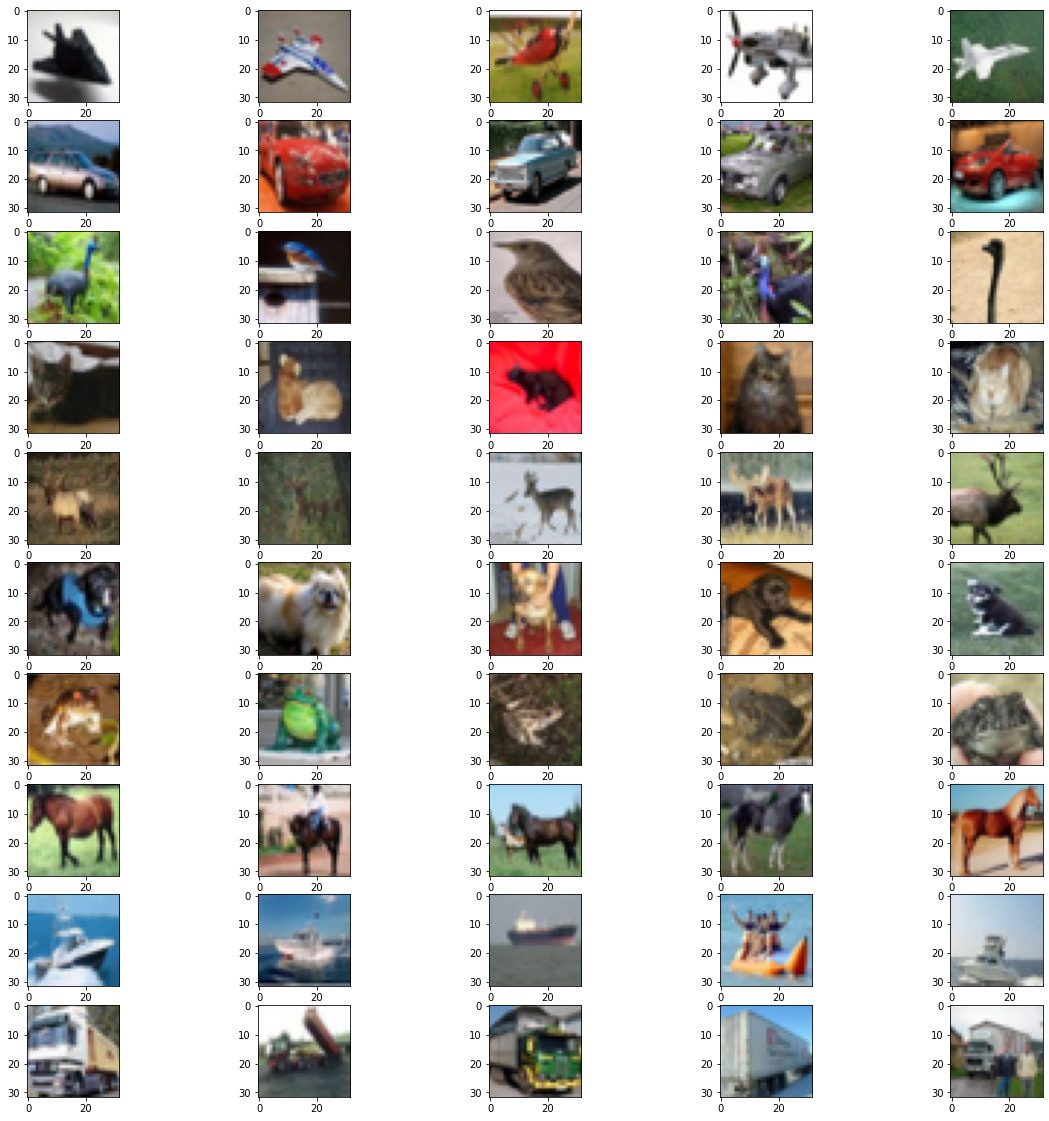

In [7]:
labels2id = {index : str(label,'utf-8') for index,label in enumerate(batch_metadata[b'label_names'])}
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,20))
l=0
for i in range(10):
  ctr = 0 
  k=0
  
  for j in train_y:

    if ctr>4:
      break
    if j==i:
      ctr+=1
      l+=1
      fig.add_subplot(10,5,l)
      plt.imshow(np.transpose(train_x[k], (1, 2, 0)))
    k+=1


In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix

In [9]:
train_x=np.reshape(train_x,(50000, 3072))

train_x

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 35,  40,  42, ...,  77,  66,  50],
       [189, 186, 185, ..., 169, 171, 171],
       [229, 236, 234, ..., 173, 162, 161]], dtype=uint8)

Performing LDA on the CIFAR-10 dataset

In [10]:
lda_model = LinearDiscriminantAnalysis(store_covariance=True)
lda_model.fit(train_x,train_y)

LinearDiscriminantAnalysis(store_covariance=True)

In [11]:
test_x=np.reshape(test_x,(10000, 3072))
predict = lda_model.predict(test_x)

In [12]:
print("Accuracy Score : ", accuracy_score(test_y,predict))

Accuracy Score :  0.3713


The accuracy is less because the CIFAR-10 dataset has a wide variety of images which are not linearly separable,hence low accuracy achieved on performing LDA.

Extracting the MNIST Dataset

In [15]:
! cp /content/gdrive/MyDrive/Assignment3/mnist.zip .

In [16]:
! unzip mnist.zip -d mnist/

Archive:  mnist.zip
   creating: mnist/mnist/
  inflating: mnist/mnist/readme.txt  
  inflating: mnist/mnist/train-labels-idx1-ubyte.gz  
  inflating: mnist/mnist/train-images-idx3-ubyte.gz  
  inflating: mnist/mnist/t10k-images-idx3-ubyte.gz  
  inflating: mnist/mnist/t10k-labels-idx1-ubyte.gz  


Visualizing one image of the MNIST dataset

(60000, 28, 28)
(10000, 28, 28)
Label : 5


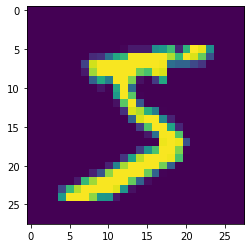

In [18]:
import gzip
def images_file_read(file_name):
    with gzip.open(file_name, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images
def labels_file_read(file_name):
    with gzip.open(file_name, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels
train_x2 = images_file_read("mnist/mnist/train-images-idx3-ubyte.gz")
print(train_x2.shape)
train_y2 = labels_file_read("mnist/mnist/train-labels-idx1-ubyte.gz")
test_x2 = images_file_read("mnist/mnist/t10k-images-idx3-ubyte.gz")
print(test_x2.shape)
test_y2 = labels_file_read("mnist/mnist/t10k-labels-idx1-ubyte.gz")

plt.imshow(train_x2[0])
print("Label :" ,  train_y2[0])

In [19]:
train_x2 = np.reshape(train_x2,(60000, 784))
test_x2 = np.reshape(test_x2,(10000, 784))

Performing LDA on the MNIST Dataset

In [20]:
lda_model1 = LinearDiscriminantAnalysis(store_covariance=True)
lda_model1.fit(train_x2,train_y2)
predict = lda_model1.predict(test_x2)

In [21]:
print("Accuracy Score : " , accuracy_score(test_y2,predict))

Accuracy Score :  0.873


Reducing the dimensions of the MNIST dataset using PCA (Principal Component Analysis)

1)Reducing the dimensionality from 784 to 15 components

In [22]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(n_components = 15)
pca.fit(train_x2)
train_x2 = pca.transform(train_x2)
test_x2 = pca.transform(test_x2)

In [23]:
lda_model = LinearDiscriminantAnalysis(store_covariance=True)
lda_model.fit(train_x2,train_y2)
predict = lda_model.predict(test_x2)
accuracy1 = accuracy_score(test_y2,predict)
print("Accuracy Score : " , accuracy1)

Accuracy Score :  0.804


Notice that even reducing the number of components from 784 to 15 ,the accuracy just decreased by just 7% !!

2)Reducing the dimensionality to 8 components

In [24]:
pca = PCA(n_components = 8)
pca.fit(train_x2)
train_x2 = pca.transform(train_x2)
test_x2 = pca.transform(test_x2)
lda_model = LinearDiscriminantAnalysis(store_covariance=True)
lda_model.fit(train_x2,train_y2)
predict = lda_model.predict(test_x2)
accuracy2 = accuracy_score(test_y2,predict)
print("Accuracy Score : " , accuracy2)

Accuracy Score :  0.7605


3)Reducing the dimensionality to 3 components

In [25]:
pca = PCA(n_components = 3)
pca.fit(train_x2)
train_x2 = pca.transform(train_x2)
test_x2 = pca.transform(test_x2)
lda_model = LinearDiscriminantAnalysis(store_covariance=True)
lda_model.fit(train_x2,train_y2)
predict = lda_model.predict(test_x2)
accuracy3 = accuracy_score(test_y2,predict)
print("Accuracy Score : " , accuracy3)

Accuracy Score :  0.466


Remark:Even after reducing the number of components to merely 3 from 784 ,the accuracy is still 46.6%.This means that most of the other dimensions among the 784 dimensions corresponded to the noise in the data.

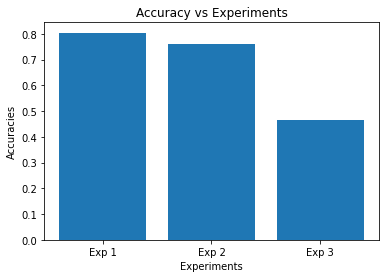

In [26]:
accuracies=[accuracy1,accuracy2,accuracy3]
labels=["Exp 1","Exp 2","Exp 3"]
plt.bar(labels,accuracies)
 
plt.xlabel("Experiments")
plt.ylabel("Accuracies")
plt.title("Accuracy vs Experiments")
plt.show()

Extracting the FMNIST Dataset

In [118]:
! cp /content/gdrive/MyDrive/Assignment3/fminst.zip .

In [14]:
! unzip fminst.zip -d fminst/

Archive:  fminst.zip
  inflating: fminst/fashion-mnist_test.csv  
  inflating: fminst/fashion-mnist_train.csv  
  inflating: fminst/t10k-images-idx3-ubyte  
  inflating: fminst/t10k-labels-idx1-ubyte  
  inflating: fminst/train-images-idx3-ubyte  
  inflating: fminst/train-labels-idx1-ubyte  


In [119]:
import pandas as pd
df_train = pd.read_csv("fminst/fashion-mnist_train.csv")
df_test = pd.read_csv("fminst/fashion-mnist_test.csv")
label = {0:"T-shirt/top",
1 :"Trouser",
2 :"Pullover",
3 :"Dress",
4 :"Coat",
5 :"Sandal",
6 :"Shirt",
7 :"Sneaker",
8 :"Bag",
9 :"Ankle boot"}

In [120]:
df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
df_train.shape

(60000, 785)

In [122]:
train_x = np.array(df_train.iloc[:,1:]).reshape(df_train.shape[0],28,28)
train_y = np.array(df_train.iloc[:,0])
test_x = np.array(df_test.iloc[:,1:]).reshape(df_test.shape[0],28,28)
test_y = np.array(df_test.iloc[:,0])

In [123]:
train_x


array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

In [124]:
train_y

array([2, 9, 6, ..., 8, 8, 7])

Visulaizing one image of the FMNIST Dataset

Label : Ankle boot


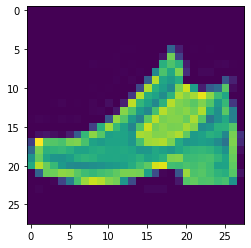

In [125]:
plt.imshow(train_x[1])
print("Label :" ,  label[train_y[1]])

Performing FDA (Fisher's Discriminant Ananlysis) from scratch on the FMNIST dataset

In [126]:
dataset = list()
for i in range(10):
  dataset.append(list())
dataset


[[], [], [], [], [], [], [], [], [], []]

In [127]:
train_x = train_x.reshape(60000,784)

In [128]:
train_x.shape

(60000, 784)

In [129]:
train_x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [130]:
train_y = train_y.tolist()

In [ ]:
train_y

In [132]:
k=0
for i in train_y:
  dataset[i].append(train_x[k])
  k+=1

In [133]:
dataset = np.array(dataset)

In [134]:
dataset.shape

(10, 6000, 784)

In [135]:
dataset = dataset.reshape(10,6000,28,28)

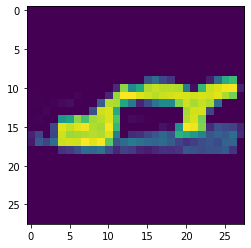

In [136]:
plt.imshow(dataset[5][10])


In [137]:
dataset = dataset.reshape(10,6000,784)


In [138]:
dataset =  dataset.reshape(10,784,6000)

In [139]:
Sw = np.cov(dataset[0])


In [140]:
Sw.shape

(784, 784)

In [141]:
for i in range(1,len(dataset)):
  Sw+=np.cov(dataset[i])

In [142]:
Sw.shape

(784, 784)

In [143]:
dataset.shape

(10, 784, 6000)

In [144]:
St = dataset.reshape(1,784,60000)

In [145]:
visualizer = St.reshape(1,60000,28,28)

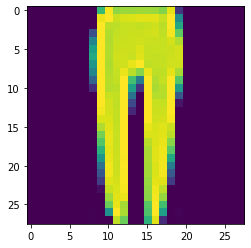

In [146]:
plt.imshow(visualizer[0][6000])

In [147]:
Sw.shape

(784, 784)

In [148]:
St.shape

(1, 784, 60000)

In [149]:
m_St = np.cov(St[0])

In [150]:
m_St.shape

(784, 784)

In [151]:
Sb = m_St - Sw

In [152]:
Sw_inv = np.linalg.inv(Sw)

In [153]:
W = np.dot(Sw_inv,Sb)

In [154]:
W

array([[-8.52835332e-01, -2.48759169e-02, -2.45014432e-02, ...,
         4.25242471e-02, -2.84975683e-02,  4.78951683e-02],
       [ 3.24097583e-02, -7.55417159e-01,  3.40390220e-02, ...,
        -6.37728368e-02,  2.70019459e-02,  1.05384922e-02],
       [-2.50318429e-02,  5.83142241e-02, -7.63821938e-01, ...,
        -6.06214995e-02, -2.20032967e-02,  5.80670169e-04],
       ...,
       [ 6.15544137e-02, -9.70548551e-03, -4.41548036e-02, ...,
        -7.27164008e-01, -2.32941382e-02,  6.29571987e-02],
       [ 5.14552229e-02,  6.68299413e-02, -5.49919157e-03, ...,
        -8.04984441e-02, -7.38087027e-01, -2.01538122e-02],
       [ 2.72573608e-02,  9.01889801e-02,  1.25333776e-01, ...,
        -5.44688475e-02, -1.19219592e-01, -7.39952346e-01]])

In [155]:
w, v = np.linalg.eig(W)

In [156]:
v

array([[ 0.01575726,  0.00209184, -0.03647599, ...,  0.01433121,
         0.00291833, -0.00840229],
       [-0.01349496, -0.05962792,  0.04218473, ...,  0.05345598,
        -0.01147855,  0.02531871],
       [-0.05146442, -0.03240982,  0.02084835, ...,  0.05496543,
         0.00885722,  0.00939271],
       ...,
       [ 0.05592097, -0.01999189, -0.06037918, ..., -0.04900847,
        -0.0100627 ,  0.0042417 ],
       [ 0.02222281, -0.05270393,  0.05982134, ...,  0.01423426,
         0.02210738, -0.06141103],
       [-0.0698258 , -0.06880959, -0.02524441, ...,  0.01341577,
         0.01340461,  0.03719124]])

In [157]:
v.shape

(784, 784)

In [158]:
Wt = np.transpose(v)

In [159]:
Y=np.dot(Wt,St[0])

In [160]:
Y.shape

(784, 60000)

In [161]:
Y = Y.reshape(60000,784)

In [162]:
train_y = np.array(df_train.iloc[:,0])

In [163]:
train_y.shape

(60000,)

In [164]:
test_x = test_x.reshape(10000,784)

Classification using LDA

In [165]:
lda_model_q3 = LinearDiscriminantAnalysis(store_covariance=True)
lda_model_q3.fit(Y,train_y)
predict_q3 = lda_model_q3.predict(test_x)
accuracy1 = accuracy_score(test_y,predict_q3)
print("Accuracy Score : " , accuracy1)

Accuracy Score :  0.0932


Applying FDA on the MNIST dataset.Implemented FDA from scratch.

(60000, 28, 28)
(10000, 28, 28)
Label : 5


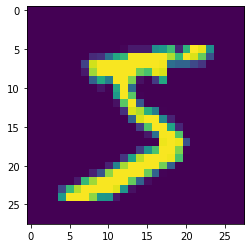

In [166]:

train_x2 = images_file_read("mnist/mnist/train-images-idx3-ubyte.gz")
print(train_x2.shape)
train_y2 = labels_file_read("mnist/mnist/train-labels-idx1-ubyte.gz")
test_x2 = images_file_read("mnist/mnist/t10k-images-idx3-ubyte.gz")
print(test_x2.shape)
test_y2 = labels_file_read("mnist/mnist/t10k-labels-idx1-ubyte.gz")
plt.imshow(train_x2[0])
print("Label :" ,  train_y2[0])

In [167]:
train_x2 = train_x2.reshape(60000,784)
test_x2 = test_x2.reshape(10000,784)

Applying PCA to MNIST dataset again so as to reduce the dimensions from 784 to 15

In [168]:
pca = PCA(n_components = 15)
pca.fit(train_x2)
train_x2 = pca.transform(train_x2)
test_x2 = pca.transform(test_x2)

In [169]:
lda_model = LinearDiscriminantAnalysis(store_covariance=True)
lda_model.fit(train_x2,train_y2)
predict = lda_model.predict(test_x2)
accuracy1 = accuracy_score(test_y2,predict)
print("Accuracy Score : " , accuracy1)

Accuracy Score :  0.8037


Applying FDA on the reduced dimensionality MNIST Dataset

In [170]:
dataset = list()
for i in range(10):
  dataset.append(list())
dataset

[[], [], [], [], [], [], [], [], [], []]

In [171]:
train_x2.shape

(60000, 15)

In [172]:
train_x2

array([[ 123.93258832, -312.67425892,  -24.51402823, ..., -114.66782928,
         749.05947694,  219.50056021],
       [1011.71837542, -294.85704944,  596.3396184 , ..., -320.319144  ,
          90.33540208, -238.74894294],
       [ -51.8496082 ,  392.17314975, -188.50974717, ...,  186.94152661,
         109.29968617, -144.7330066 ],
       ...,
       [-178.05344904,  160.07822616, -257.61316483, ...,  166.80175732,
         114.34062634,  372.84684804],
       [ 130.60607256,   -5.59195657,  513.85867785, ..., -423.98644176,
         -82.30764586,  276.13627495],
       [-173.43595213,  -24.71879403,  556.0188504 , ...,  221.2808092 ,
        -287.57340545,  180.87342553]])

In [173]:
train_y2.shape

(60000,)

In [174]:
train_y2

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [175]:
train_x2  = train_x2.tolist()

In [176]:
ctr = [0,0,0,0,0,0,0,0,0,0]
ctr2=0

In [177]:
train_y2 = train_y2.tolist()

In [ ]:
train_x2

In [ ]:
train_y2

In [180]:
k=0
for i in train_y2:
  dataset[i].append(train_x2[k])
  ctr[i]+=1
  ctr2+=1
  k+=1

In [181]:
ctr

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

In [182]:
ctr2

60000

In [ ]:
dataset

In [184]:
x0 = list()
x1 = list()
x2 = list()
x3 = list()
x4 = list()
x5 = list()
x6 = list()
x7 = list()
x8 = list()
x9 = list()

In [ ]:
dataset

In [186]:
x0 = np.asarray(dataset[0]).reshape(15,-1)
x1 = np.asarray(dataset[1]).reshape(15,-1)
x2 = np.asarray(dataset[2]).reshape(15,-1)
x3 = np.asarray(dataset[3]).reshape(15,-1)
x4 = np.asarray(dataset[4]).reshape(15,-1)
x5 = np.asarray(dataset[5]).reshape(15,-1)
x6 = np.asarray(dataset[6]).reshape(15,-1)
x7 = np.asarray(dataset[7]).reshape(15,-1)
x8 = np.asarray(dataset[8]).reshape(15,-1)
x9 = np.asarray(dataset[9]).reshape(15,-1)

In [187]:
x9.shape

(15, 5949)

In [188]:
Sw = np.cov(x0)+np.cov(x1)+np.cov(x2)+np.cov(x3)+np.cov(x4)+np.cov(x5)+np.cov(x6)+np.cov(x7)+np.cov(x8)+np.cov(x9)

In [189]:
Sw.shape

(15, 15)

In [190]:
train_x2 = np.asarray(train_x2)

In [191]:
train_x2 = train_x2.reshape(15,-1)

In [192]:
mean_train_x2 = np.mean(train_x2)

In [193]:
train_x2.shape

(15, 60000)

In [194]:
train_x2_cov = np.cov(train_x2)
St = train_x2_cov

In [195]:
Sb = St - Sw

In [196]:
Sw_inv = np.linalg.inv(Sw)

In [197]:
W = np.dot(Sw_inv,Sb)

In [198]:
w, v = np.linalg.eig(W)

In [199]:
v.shape

(15, 15)

In [200]:
Wt = np.transpose(v)

In [201]:
Y=np.dot(Wt,train_x2)

In [202]:
Y.shape

(15, 60000)

In [203]:
Y = Y.reshape(60000,15)

In [204]:
train_y2 = np.asarray(train_y2)

Applying LDA for classification

In [205]:
lda_model_q3 = LinearDiscriminantAnalysis(store_covariance=True)
lda_model_q3.fit(Y,train_y2)
predict_q3 = lda_model_q3.predict(test_x2)
accuracy1 = accuracy_score(test_y2,predict_q3)
print("Accuracy Score : " , accuracy1)

Accuracy Score :  0.0017
